# Basic Analysis

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [84]:
df = pd.read_excel("../dataset1.xlsx")
df

,Timestamp,Select your Age Group (in years):,Select your Gender:,What is your field of Study?,How many hours do you spend in front of a screen daily? (for work/study),Which device do you use most frequently?,"How often do you multitask while using screens? (e.g., watching videos while studying)",Do you regularly use a screen in low-light settings?,How often do you experience the following after prolonged screen time? (Scroll options sideways <----->) [Eye strain],How often do you experience the following after prolonged screen time? (Scroll options sideways <----->) [Blurry vision],...,How often do you experience the following after prolonged screen time? (Scroll options sideways <----->) [Headaches],Have you ever been formally diagnosed with an eye condition?,"If diagnosed, what was the condition?","How often do you use vision correction? (glasses, lenses)",Have you undergone any eye-related surgery or treatment?,How frequently do you visit an eye care specialist?,How often do you take breaks while using screens?,Do you have a family history of eye-related health problems?,"On a scale of 1-5, how concerned are you about the impact of screen time on your eye health?",Have you ever modified your screen time habits after learning about its impact on eye health?
0,2024-12-13 19:08:49.716,18 - 22,Male,IT (related to Computer Science),8+ hours,Smartphone,Often,Occasionally,Often,Sometimes,...,Often,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,2024-12-18 14:17:09.969,23 - 25,Male,IT (related to Computer Science),6 - 8 hours,Laptop/PC,Never,Occasionally,Never,Rarely,...,Rarely,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,2024-12-18 15:46:21.946,23 - 25,Male,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,Always,Yes,Rarely,Never,...,Sometimes,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,2024-12-18 21:34:04.158,28+,Male,"Non-IT (like: Business, Healthcare)",8+ hours,TV/Other,Never,No,Rarely,Rarely,...,Never,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,2024-12-18 21:34:25.292,18 - 22,Female,IT (related to Computer Science),8+ hours,Smartphone,Always,Occasionally,Sometimes,Never,...,Sometimes,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2024-12-24 16:13:21.397,26 - 28,Female,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,Often,Yes,Sometimes,Sometimes,...,Often,Yes,Hyperopia (farsightedness),Occasionally,NaN,Every 2-3 years,Only when I feel discomfort,No,3 = Moderately concerned,I plan to
221,2024-12-24 16:13:55.855,26 - 28,Female,"Non-IT (like: Business, Healthcare)",8+ hours,Smartphone,Always,Yes,Often,Sometimes,...,Often,No,None of these,Never,NaN,Never,Every 30 mins or less,Yes,2 = Slightly concerned,Yes
222,2024-12-24 16:40:51.947,26 - 28,Female,"Non-IT (like: Business, Healthcare)",Less than 2 hours,Smartphone,Sometimes,Yes,Sometimes,Sometimes,...,Sometimes,No,None of these,Never,NaN,Only when I experience issues,Only when I feel discomfort,Yes,3 = Moderately concerned,I plan to
223,2024-12-24 18:09:39.335,Under 18,Female,"Non-IT (like: Business, Healthcare)",2 - 4 hours,Smartphone,Often,Yes,Never,Sometimes,...,Never,Yes,Hyperopia (farsightedness),Daily,NaN,Only when I experience issues,Only when I feel discomfort,Yes,3 = Moderately concerned,Yes


<Axes: xlabel='What is your field of Study?', ylabel='How many hours do you spend in front of a screen daily? (for work/study)  '>

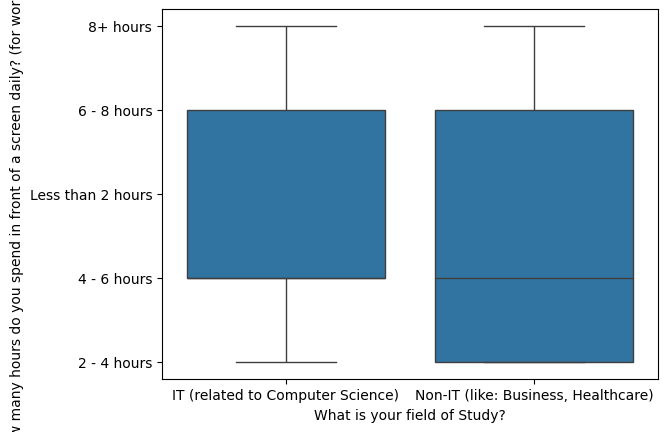

In [85]:
sns.boxplot(x="What is your field of Study?", y="How many hours do you spend in front of a screen daily? (for work/study)  ", data=df)

In [86]:
df.drop("Timestamp",axis=1, inplace=True)

In [87]:
columns = list(df.columns)
columns[0] = "age_groups"
columns[1] = "gender"
columns[2] = "field"
columns[3] = "screen_time"
columns[4] = "frequent_device"
columns[5] = "multitask"
columns[6] = "low_light"
columns[7] = "eye_strain"
columns[8] = "blurry_vision"
columns[9] = "redness"
columns[10] = "dryness"
columns[11] = "headaches"
columns[12] = "eye_condition"
columns[13] = "which_condition"
columns[14] = "vision_correction"
columns[15] = "surgery"
columns[16] = "eye_specialist"
columns[17] = "breaks"
columns[18] = "family_history"
columns[19] = "concern"
columns[20] = "habits"

In [88]:
df.columns = columns

In [89]:
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,Male,IT (related to Computer Science),8+ hours,Smartphone,Often,Occasionally,Often,Sometimes,Rarely,...,Often,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,Male,IT (related to Computer Science),6 - 8 hours,Laptop/PC,Never,Occasionally,Never,Rarely,Often,...,Rarely,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,Male,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,Always,Yes,Rarely,Never,Never,...,Sometimes,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,Male,"Non-IT (like: Business, Healthcare)",8+ hours,TV/Other,Never,No,Rarely,Rarely,Rarely,...,Never,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,Female,IT (related to Computer Science),8+ hours,Smartphone,Always,Occasionally,Sometimes,Never,Never,...,Sometimes,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No


In [90]:
likert_mapping = {
    "Never":0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3,
    "Always": 4
}
df["multitask"] = df["multitask"].map(likert_mapping)
df["multitask"] = pd.Categorical(df["multitask"], categories=[0, 1, 2, 3, 4], ordered=True)
df

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,Male,IT (related to Computer Science),8+ hours,Smartphone,3,Occasionally,Often,Sometimes,Rarely,...,Often,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,Male,IT (related to Computer Science),6 - 8 hours,Laptop/PC,0,Occasionally,Never,Rarely,Often,...,Rarely,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,Male,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,4,Yes,Rarely,Never,Never,...,Sometimes,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,Male,"Non-IT (like: Business, Healthcare)",8+ hours,TV/Other,0,No,Rarely,Rarely,Rarely,...,Never,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,Female,IT (related to Computer Science),8+ hours,Smartphone,4,Occasionally,Sometimes,Never,Never,...,Sometimes,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,26 - 28,Female,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,3,Yes,Sometimes,Sometimes,Never,...,Often,Yes,Hyperopia (farsightedness),Occasionally,NaN,Every 2-3 years,Only when I feel discomfort,No,3 = Moderately concerned,I plan to
221,26 - 28,Female,"Non-IT (like: Business, Healthcare)",8+ hours,Smartphone,4,Yes,Often,Sometimes,Rarely,...,Often,No,None of these,Never,NaN,Never,Every 30 mins or less,Yes,2 = Slightly concerned,Yes
222,26 - 28,Female,"Non-IT (like: Business, Healthcare)",Less than 2 hours,Smartphone,2,Yes,Sometimes,Sometimes,Sometimes,...,Sometimes,No,None of these,Never,NaN,Only when I experience issues,Only when I feel discomfort,Yes,3 = Moderately concerned,I plan to
223,Under 18,Female,"Non-IT (like: Business, Healthcare)",2 - 4 hours,Smartphone,3,Yes,Never,Sometimes,Never,...,Never,Yes,Hyperopia (farsightedness),Daily,NaN,Only when I experience issues,Only when I feel discomfort,Yes,3 = Moderately concerned,Yes


In [91]:
df["eye_strain"] = df["eye_strain"].map(likert_mapping)
df["eye_strain"] = pd.Categorical(df["eye_strain"], categories=[0, 1, 2, 3, 4], ordered=True)

df["blurry_vision"] = df["blurry_vision"].map(likert_mapping)
df["blurry_vision"] = pd.Categorical(df["blurry_vision"], categories=[0, 1, 2, 3, 4], ordered=True)

df["redness"] = df["redness"].map(likert_mapping)
df["redness"] = pd.Categorical(df["redness"], categories=[0, 1, 2, 3, 4], ordered=True)

df["dryness"] = df["dryness"].map(likert_mapping)
df["dryness"] = pd.Categorical(df["dryness"], categories=[0, 1, 2, 3, 4], ordered=True)

df["headaches"] = df["headaches"].map(likert_mapping)
df["headaches"] = pd.Categorical(df["headaches"], categories=[0, 1, 2, 3, 4], ordered=True)



df

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,Male,IT (related to Computer Science),8+ hours,Smartphone,3,Occasionally,3,2,1,...,3,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,Male,IT (related to Computer Science),6 - 8 hours,Laptop/PC,0,Occasionally,0,1,3,...,1,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,Male,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,4,Yes,1,0,0,...,2,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,Male,"Non-IT (like: Business, Healthcare)",8+ hours,TV/Other,0,No,1,1,1,...,0,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,Female,IT (related to Computer Science),8+ hours,Smartphone,4,Occasionally,2,0,0,...,2,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,26 - 28,Female,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,3,Yes,2,2,0,...,3,Yes,Hyperopia (farsightedness),Occasionally,NaN,Every 2-3 years,Only when I feel discomfort,No,3 = Moderately concerned,I plan to
221,26 - 28,Female,"Non-IT (like: Business, Healthcare)",8+ hours,Smartphone,4,Yes,3,2,1,...,3,No,None of these,Never,NaN,Never,Every 30 mins or less,Yes,2 = Slightly concerned,Yes
222,26 - 28,Female,"Non-IT (like: Business, Healthcare)",Less than 2 hours,Smartphone,2,Yes,2,2,2,...,2,No,None of these,Never,NaN,Only when I experience issues,Only when I feel discomfort,Yes,3 = Moderately concerned,I plan to
223,Under 18,Female,"Non-IT (like: Business, Healthcare)",2 - 4 hours,Smartphone,3,Yes,0,2,0,...,0,Yes,Hyperopia (farsightedness),Daily,NaN,Only when I experience issues,Only when I feel discomfort,Yes,3 = Moderately concerned,Yes


In [92]:
for col in list(df.columns):
    print(col, df[col].unique())

age_groups ['18 - 22' '23 - 25' '28+' 'Under 18' '26 - 28']
gender ['Male' 'Female']
field ['IT (related to Computer Science)' 'Non-IT (like: Business, Healthcare)']
screen_time ['8+ hours' '6 - 8 hours' 'Less than 2 hours' '4 - 6 hours' '2 - 4 hours']
frequent_device ['Smartphone' 'Laptop/PC' 'TV/Other' 'Tablet']
multitask [3, 0, 4, 2, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
low_light ['Occasionally' 'Yes' 'No']
eye_strain [3, 0, 1, 2, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
blurry_vision [2, 1, 0, 4, 3]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
redness [1, 3, 0, 2, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
dryness [2, 3, 1, 0, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
headaches [3, 1, 2, 0, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
eye_condition ['Yes' 'No']
which_condition ['Hyperopia (farsightedness)' 'Myopia (nearsightedness)' 'None '
 'None of these' 'Astigmatism (blurred or distorted vision)'
 'Dry Eye Syndrome' nan]
vision_correction ['Daily' 'Never' 'O

In [93]:
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,Male,IT (related to Computer Science),8+ hours,Smartphone,3,Occasionally,3,2,1,...,3,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,Male,IT (related to Computer Science),6 - 8 hours,Laptop/PC,0,Occasionally,0,1,3,...,1,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,Male,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,4,Yes,1,0,0,...,2,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,Male,"Non-IT (like: Business, Healthcare)",8+ hours,TV/Other,0,No,1,1,1,...,0,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,Female,IT (related to Computer Science),8+ hours,Smartphone,4,Occasionally,2,0,0,...,2,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No


In [94]:
gender_mapping = {"Male": 0, "Female": 1}
df["gender"] = df["gender"].map(gender_mapping)

In [95]:
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,IT (related to Computer Science),8+ hours,Smartphone,3,Occasionally,3,2,1,...,3,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,0,IT (related to Computer Science),6 - 8 hours,Laptop/PC,0,Occasionally,0,1,3,...,1,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,0,"Non-IT (like: Business, Healthcare)",6 - 8 hours,Smartphone,4,Yes,1,0,0,...,2,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,0,"Non-IT (like: Business, Healthcare)",8+ hours,TV/Other,0,No,1,1,1,...,0,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,1,IT (related to Computer Science),8+ hours,Smartphone,4,Occasionally,2,0,0,...,2,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No


In [96]:
field_mapping = {"IT (related to Computer Science)": 1, "Non-IT (like: Business, Healthcare)":0}
df["field"] = df["field"].map(field_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,8+ hours,Smartphone,3,Occasionally,3,2,1,...,3,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,0,1,6 - 8 hours,Laptop/PC,0,Occasionally,0,1,3,...,1,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,0,0,6 - 8 hours,Smartphone,4,Yes,1,0,0,...,2,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,0,0,8+ hours,TV/Other,0,No,1,1,1,...,0,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,1,1,8+ hours,Smartphone,4,Occasionally,2,0,0,...,2,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No


In [97]:
# gender ?
# 0 is Male
# 1 is Female
# field ?
# 1 is IT
# 0 is Non-IT

In [98]:
device_mapping = {"Smartphone": 0, "Laptop/PC": 1, "Tablet": 2, "TV/Other":3}
df["frequent_device"] = df["frequent_device"].map(device_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,8+ hours,0,3,Occasionally,3,2,1,...,3,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,0,1,6 - 8 hours,1,0,Occasionally,0,1,3,...,1,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,0,0,6 - 8 hours,0,4,Yes,1,0,0,...,2,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,0,0,8+ hours,3,0,No,1,1,1,...,0,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,1,1,8+ hours,0,4,Occasionally,2,0,0,...,2,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No


In [99]:
screen_time_mapping = {"6 - 8 hours": 7, "8+ hours": 9, "4 - 6 hours": 5, "Less than 2 hours": 2, "2 - 4 hours": 3}
df["screen_time"] = df["screen_time"].map(screen_time_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,Yes,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,Yes,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,No,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,0,0,9,3,0,No,1,1,1,...,0,No,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,Yes,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No


In [100]:
df["eye_condition"] = df["eye_condition"].map({"Yes": 1, "No": 0})
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,1,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,Yes,4 = Very concerned,Yes
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,1,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,Yes,5 = Extremely concerned,Yes
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,0,None,Never,NaN,Never,Only when I feel discomfort,No,4 = Very concerned,Yes
3,28+,0,0,9,3,0,No,1,1,1,...,0,0,None of these,Never,NaN,Never,Never,No,5 = Extremely concerned,I plan to
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,Yes,4 = Very concerned,No


In [101]:
df["family_history"] = df["family_history"].map({"Yes": 1, "No": 0})
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,1,Hyperopia (farsightedness),Daily,No,Annually,Only when I feel discomfort,1,4 = Very concerned,Yes
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,1,Myopia (nearsightedness),Daily,NaN,Only when I experience issues,Every 30 mins or less,1,5 = Extremely concerned,Yes
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,0,None,Never,NaN,Never,Only when I feel discomfort,0,4 = Very concerned,Yes
3,28+,0,0,9,3,0,No,1,1,1,...,0,0,None of these,Never,NaN,Never,Never,0,5 = Extremely concerned,I plan to
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),Daily,NaN,Every 2-3 years,Every 30 mins or less,1,4 = Very concerned,No


In [102]:
vision_correction_mapping = {"Daily": 2, "Occasionally": 1, "Never": 0}
df["vision_correction"] = df["vision_correction"].map(vision_correction_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,1,Hyperopia (farsightedness),2,No,Annually,Only when I feel discomfort,1,4 = Very concerned,Yes
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,1,Myopia (nearsightedness),2,NaN,Only when I experience issues,Every 30 mins or less,1,5 = Extremely concerned,Yes
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,0,None,0,NaN,Never,Only when I feel discomfort,0,4 = Very concerned,Yes
3,28+,0,0,9,3,0,No,1,1,1,...,0,0,None of these,0,NaN,Never,Never,0,5 = Extremely concerned,I plan to
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),2,NaN,Every 2-3 years,Every 30 mins or less,1,4 = Very concerned,No


In [103]:
eye_specialist_mapping = {"Annually": 3, "Every 2-3 years": 2, "Only when I experience issues": 1, "Never": 0}
df["eye_specialist"] = df["eye_specialist"].map(eye_specialist_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,1,Hyperopia (farsightedness),2,No,3,Only when I feel discomfort,1,4 = Very concerned,Yes
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,1,Myopia (nearsightedness),2,NaN,1,Every 30 mins or less,1,5 = Extremely concerned,Yes
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,0,None,0,NaN,0,Only when I feel discomfort,0,4 = Very concerned,Yes
3,28+,0,0,9,3,0,No,1,1,1,...,0,0,None of these,0,NaN,0,Never,0,5 = Extremely concerned,I plan to
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),2,NaN,2,Every 30 mins or less,1,4 = Very concerned,No


In [104]:
breaks_mapping = {"Every 30 mins or less": 3, "Every 1-2 hours": 2, "Only when I feel discomfort": 1, "Never": 0}
df["breaks"] = df["breaks"].map(breaks_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,1,Hyperopia (farsightedness),2,No,3,1,1,4 = Very concerned,Yes
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,1,Myopia (nearsightedness),2,NaN,1,3,1,5 = Extremely concerned,Yes
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,0,None,0,NaN,0,1,0,4 = Very concerned,Yes
3,28+,0,0,9,3,0,No,1,1,1,...,0,0,None of these,0,NaN,0,0,0,5 = Extremely concerned,I plan to
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),2,NaN,2,3,1,4 = Very concerned,No


In [105]:
df["concern"] = df["concern"].str.split(" = ").str[0].astype(int)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,1,Hyperopia (farsightedness),2,No,3,1,1,4,Yes
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,1,Myopia (nearsightedness),2,NaN,1,3,1,5,Yes
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,0,None,0,NaN,0,1,0,4,Yes
3,28+,0,0,9,3,0,No,1,1,1,...,0,0,None of these,0,NaN,0,0,0,5,I plan to
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),2,NaN,2,3,1,4,No


In [106]:
habits_mapping = {"Yes": 1, "No": 0, "I plan to": 2}
df["habits"] = df["habits"].map(habits_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,Occasionally,3,2,1,...,3,1,Hyperopia (farsightedness),2,No,3,1,1,4,1
1,23 - 25,0,1,7,1,0,Occasionally,0,1,3,...,1,1,Myopia (nearsightedness),2,NaN,1,3,1,5,1
2,23 - 25,0,0,7,0,4,Yes,1,0,0,...,2,0,None,0,NaN,0,1,0,4,1
3,28+,0,0,9,3,0,No,1,1,1,...,0,0,None of these,0,NaN,0,0,0,5,2
4,18 - 22,1,1,9,0,4,Occasionally,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),2,NaN,2,3,1,4,0


In [107]:
low_light_mapping = {"Yes": 2, "Occasionally": 1, "No": 0}
df["low_light"] = df["low_light"].map(low_light_mapping)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,...,headaches,eye_condition,which_condition,vision_correction,surgery,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,1,3,2,1,...,3,1,Hyperopia (farsightedness),2,No,3,1,1,4,1
1,23 - 25,0,1,7,1,0,1,0,1,3,...,1,1,Myopia (nearsightedness),2,NaN,1,3,1,5,1
2,23 - 25,0,0,7,0,4,2,1,0,0,...,2,0,None,0,NaN,0,1,0,4,1
3,28+,0,0,9,3,0,0,1,1,1,...,0,0,None of these,0,NaN,0,0,0,5,2
4,18 - 22,1,1,9,0,4,1,2,0,0,...,2,1,Astigmatism (blurred or distorted vision),2,NaN,2,3,1,4,0


In [108]:
df.drop("surgery",axis=1, inplace=True)
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,dryness,headaches,eye_condition,which_condition,vision_correction,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,1,3,2,1,2,3,1,Hyperopia (farsightedness),2,3,1,1,4,1
1,23 - 25,0,1,7,1,0,1,0,1,3,3,1,1,Myopia (nearsightedness),2,1,3,1,5,1
2,23 - 25,0,0,7,0,4,2,1,0,0,1,2,0,None,0,0,1,0,4,1
3,28+,0,0,9,3,0,0,1,1,1,0,0,0,None of these,0,0,0,0,5,2
4,18 - 22,1,1,9,0,4,1,2,0,0,2,2,1,Astigmatism (blurred or distorted vision),2,2,3,1,4,0


In [109]:
df.shape

(225, 20)

In [110]:
df.head()

,age_groups,gender,field,screen_time,frequent_device,multitask,low_light,eye_strain,blurry_vision,redness,dryness,headaches,eye_condition,which_condition,vision_correction,eye_specialist,breaks,family_history,concern,habits
0,18 - 22,0,1,9,0,3,1,3,2,1,2,3,1,Hyperopia (farsightedness),2,3,1,1,4,1
1,23 - 25,0,1,7,1,0,1,0,1,3,3,1,1,Myopia (nearsightedness),2,1,3,1,5,1
2,23 - 25,0,0,7,0,4,2,1,0,0,1,2,0,None,0,0,1,0,4,1
3,28+,0,0,9,3,0,0,1,1,1,0,0,0,None of these,0,0,0,0,5,2
4,18 - 22,1,1,9,0,4,1,2,0,0,2,2,1,Astigmatism (blurred or distorted vision),2,2,3,1,4,0


In [111]:
df.to_excel("encoded_dataset.xlsx")

In [113]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df["field"], df["eye_condition"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 0.03759289007700985, p-value: 0.846262906521819


In [114]:
from scipy.stats import ttest_ind, mannwhitneyu
it_screen_time = df[df["field"] == 1]["screen_time"]
non_it_screen_time = df[df["field"] == 0]["screen_time"]
t_stat, p_val = ttest_ind(it_screen_time, non_it_screen_time)
print(f"T-Test: {t_stat}, p-value: {p_val}")


T-Test: 2.902632202328106, p-value: 0.004071726141401399


In [115]:
from scipy.stats import spearmanr
corr, p = spearmanr(df["screen_time"], df["concern"])
print(f"Spearman Correlation: {corr}, p-value: {p}")


Spearman Correlation: 0.08577616661587338, p-value: 0.19989881463734874


In [116]:
# from sklearn.linear_model import LogisticRegression
# X = df[["screen_time", "low_light", "gender"]]
# y = df["eye_condition"].map({"Yes": 1, "No": 0})
# model = LogisticRegression().fit(X, y)
# print(model.coef_)


ValueError: Input y contains NaN.

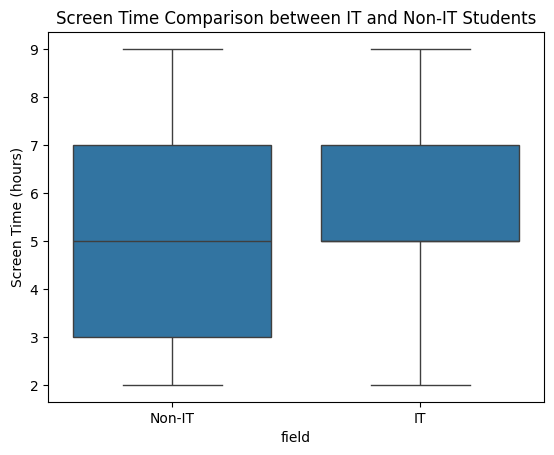

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="field", y="screen_time", data=df)
plt.xticks([0, 1], ["Non-IT", "IT"])
plt.title("Screen Time Comparison between IT and Non-IT Students")
plt.ylabel("Screen Time (hours)")
plt.show()


In [120]:
eye_condition_by_field = df.groupby("field")["eye_condition"].value_counts(normalize=True).unstack()
eye_condition_by_field *= 100  # Convert to percentages for easier interpretation
print(eye_condition_by_field)


eye_condition          0          1
field                              
0              50.450450  49.549550
1              52.631579  47.368421


In [121]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["field"], df["eye_condition"])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 0.03759289007700985, p-value: 0.846262906521819


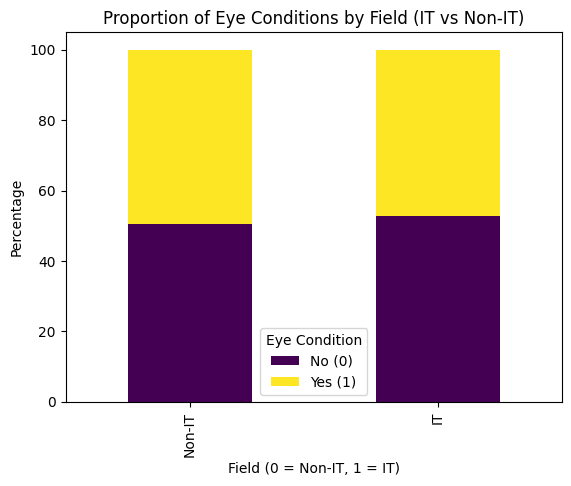

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot proportions
eye_condition_by_field.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Proportion of Eye Conditions by Field (IT vs Non-IT)")
plt.xlabel("Field (0 = Non-IT, 1 = IT)")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=["Non-IT", "IT"])
plt.legend(["No (0)", "Yes (1)"], title="Eye Condition")
plt.show()


In [123]:
eye_condition_by_screen_time = df.groupby("screen_time")["eye_condition"].value_counts(normalize=True).unstack()
eye_condition_by_screen_time *= 100  # Convert to percentages for easier interpretation

print(eye_condition_by_screen_time)

eye_condition          0          1
screen_time                        
2              50.000000  50.000000
3              53.061224  46.938776
5              67.605634  32.394366
7              42.857143  57.142857
9              32.558140  67.441860


In [124]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["screen_time"], df["eye_condition"])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 14.872808999888655, p-value: 0.00497242172360701


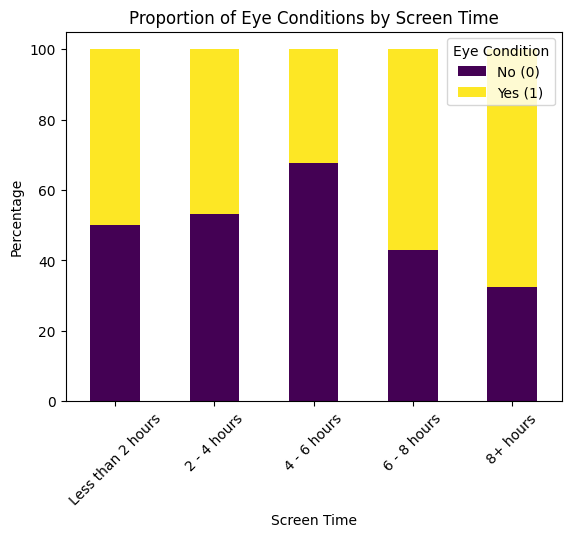

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot proportions of eye_condition by screen_time
eye_condition_by_screen_time.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Proportion of Eye Conditions by Screen Time")
plt.xlabel("Screen Time")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Less than 2 hours", "2 - 4 hours", "4 - 6 hours", "6 - 8 hours", "8+ hours"], rotation=45)
plt.legend(["No (0)", "Yes (1)"], title="Eye Condition")
plt.show()


In [126]:

# Group by multitask and eye_condition
multitask_eye_condition = df.groupby("multitask")["eye_condition"].value_counts(normalize=True).unstack()
multitask_eye_condition *= 100  # Convert to percentages for easier interpretation

print(multitask_eye_condition)

eye_condition          0          1
multitask                          
0              53.846154  46.153846
1              45.161290  54.838710
2              60.256410  39.743590
3              58.064516  41.935484
4              29.268293  70.731707


C:\Users\user\AppData\Local\Temp\ipykernel_4168\1185960578.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multitask_eye_condition = df.groupby("multitask")["eye_condition"].value_counts(normalize=True).unstack()


In [127]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["multitask"], df["eye_condition"])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 12.10491924173149, p-value: 0.01658787648792749


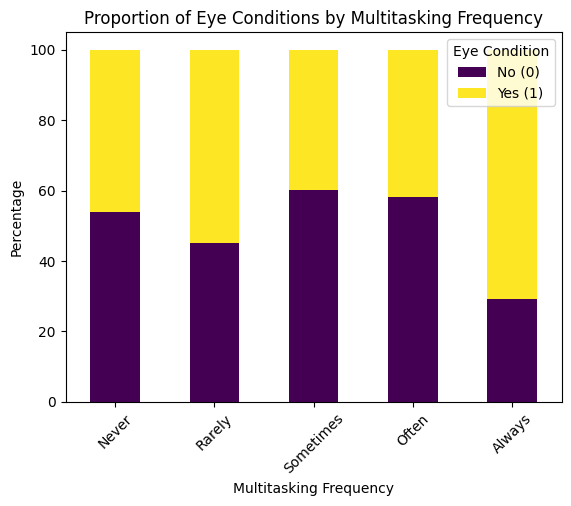

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot proportions of eye_condition by multitask
multitask_eye_condition.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Proportion of Eye Conditions by Multitasking Frequency")
plt.xlabel("Multitasking Frequency")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Never", "Rarely", "Sometimes", "Often", "Always"], rotation=45)
plt.legend(["No (0)", "Yes (1)"], title="Eye Condition")
plt.show()


In [129]:

# Group by field (IT vs Non-IT) and calculate the proportion of each vision_correction category
field_vision_correction = df.groupby("field")["vision_correction"].value_counts(normalize=True).unstack() * 100

# Print the result
print(field_vision_correction)


vision_correction          0          1          2
field                                             
0                  48.648649  21.621622  29.729730
1                  48.245614  11.403509  40.350877


In [130]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["field"], df["vision_correction"])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 5.379641469231631, p-value: 0.06789310916521547


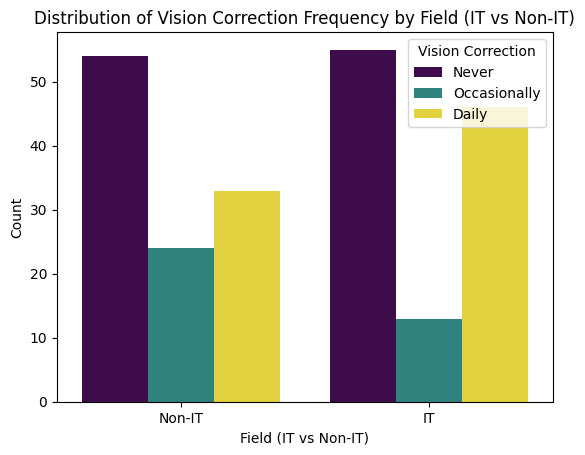

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of vision_correction across field
sns.countplot(data=df, x="field", hue="vision_correction", palette="viridis")

# Set labels and title
plt.title("Distribution of Vision Correction Frequency by Field (IT vs Non-IT)")
plt.xlabel("Field (IT vs Non-IT)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Non-IT", "IT"])
plt.legend(title="Vision Correction", labels=["Never", "Occasionally", "Daily"])
plt.show()


In [132]:
# Group by eye_condition and calculate the proportion of family_history (Yes/No)
eye_condition_family_history = df.groupby("eye_condition")["family_history"].value_counts(normalize=True).unstack() * 100

# Print the result
print(eye_condition_family_history)


family_history          0          1
eye_condition                       
0               72.413793  27.586207
1               61.467890  38.532110


In [133]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["eye_condition"], df["family_history"])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2}, p-value: {p}")


Chi-Square: 2.574673084484494, p-value: 0.10858653283316594


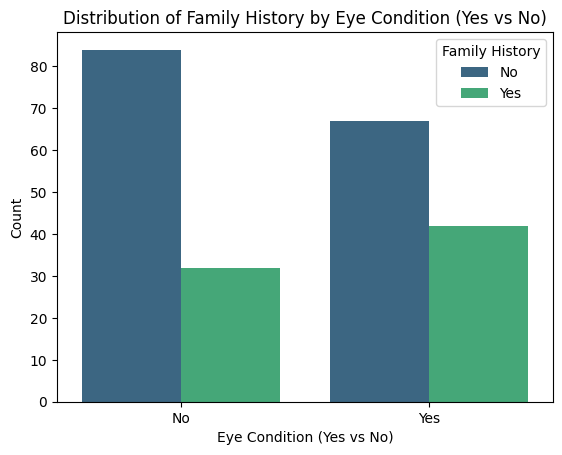

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of family_history based on eye_condition
sns.countplot(data=df, x="eye_condition", hue="family_history", palette="viridis")

# Set labels and title
plt.title("Distribution of Family History by Eye Condition (Yes vs No)")
plt.xlabel("Eye Condition (Yes vs No)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.legend(title="Family History", labels=["No", "Yes"])
plt.show()


In [135]:
# Group by eye_condition and calculate the average number of breaks
breaks_by_eye_condition = df.groupby("eye_condition")["breaks"].mean()

# Print the result
print(breaks_by_eye_condition)


eye_condition
0    1.534483
1    1.449541
Name: breaks, dtype: float64


In [137]:
from scipy.stats import ttest_ind, mannwhitneyu

# Separate the data into two groups
eye_condition_yes = df[df["eye_condition"] == 1]["breaks"]
eye_condition_no = df[df["eye_condition"] == 0]["breaks"]

# Perform a T-test
t_stat, p_val = ttest_ind(eye_condition_yes, eye_condition_no)
print(f"T-Test: {t_stat}, p-value: {p_val}")

# If the data is not normally distributed, use Mann-Whitney U test
u_stat, p_val_u = mannwhitneyu(eye_condition_yes, eye_condition_no)
print(f"Mann-Whitney U Test: {u_stat}, p-value: {p_val_u}")


T-Test: -0.7211990838651365, p-value: 0.47154245397181604
Mann-Whitney U Test: 6029.5, p-value: 0.5103315773233819


C:\Users\user\AppData\Local\Temp\ipykernel_4168\3639953482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="eye_condition", y="breaks", palette="Set2")


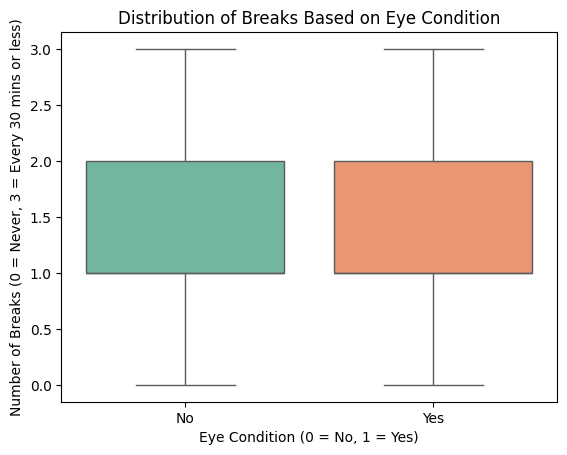

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize breaks by eye condition
sns.boxplot(data=df, x="eye_condition", y="breaks", palette="Set2")

# Set labels and title
plt.title("Distribution of Breaks Based on Eye Condition")
plt.xlabel("Eye Condition (0 = No, 1 = Yes)")
plt.ylabel("Number of Breaks (0 = Never, 3 = Every 30 mins or less)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()


In [139]:
# Group by eye_condition and calculate the average low_light
low_light_by_eye_condition = df.groupby("eye_condition")["low_light"].mean()

# Print the result
print(low_light_by_eye_condition)


eye_condition
0    1.431034
1    1.403670
Name: low_light, dtype: float64


In [140]:
from scipy.stats import ttest_ind, mannwhitneyu

# Separate the data into two groups
eye_condition_yes = df[df["eye_condition"] == 1]["low_light"]
eye_condition_no = df[df["eye_condition"] == 0]["low_light"]

# Perform a T-test
t_stat, p_val = ttest_ind(eye_condition_yes, eye_condition_no)
print(f"T-Test: {t_stat}, p-value: {p_val}")

# If the data is not normally distributed, use Mann-Whitney U test
u_stat, p_val_u = mannwhitneyu(eye_condition_yes, eye_condition_no)
print(f"Mann-Whitney U Test: {u_stat}, p-value: {p_val_u}")


T-Test: -0.2788464547520582, p-value: 0.7806210763842878
Mann-Whitney U Test: 6081.0, p-value: 0.5799412932292325


C:\Users\user\AppData\Local\Temp\ipykernel_4168\414179593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="eye_condition", y="low_light", palette="Set2")


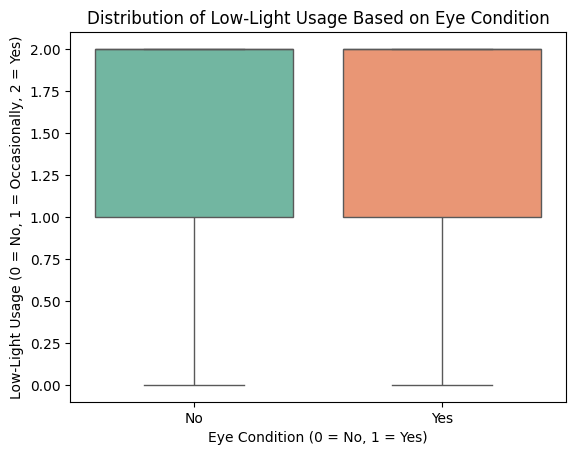

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize low_light by eye condition
sns.boxplot(data=df, x="eye_condition", y="low_light", palette="Set2")

# Set labels and title
plt.title("Distribution of Low-Light Usage Based on Eye Condition")
plt.xlabel("Eye Condition (0 = No, 1 = Yes)")
plt.ylabel("Low-Light Usage (0 = No, 1 = Occasionally, 2 = Yes)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()


In [142]:
# Group by 'field' and count the number of males (gender == 0) and females (gender == 1)
gender_distribution = df.groupby("field")["gender"].value_counts().unstack()

# Print the result
print(gender_distribution)


gender   0   1
field         
0       24  87
1       68  46


In [143]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["gender"], df["field"])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2_stat}, p-value: {p_val}")


Chi-Square: 32.09360680502512, p-value: 1.469200008380072e-08


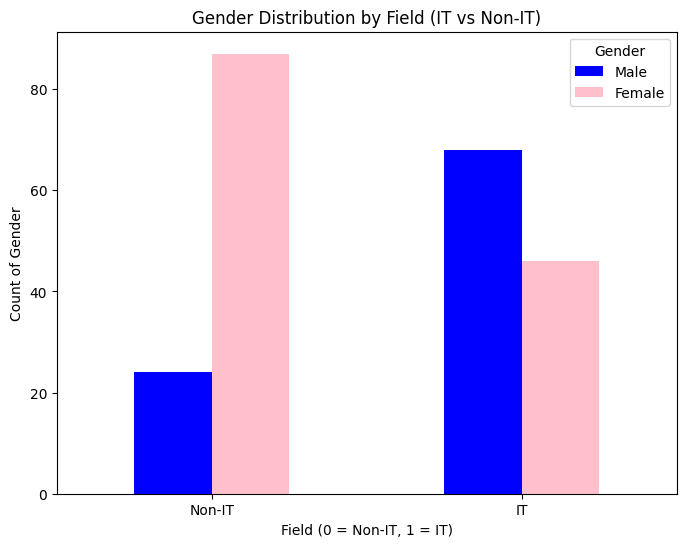

In [144]:
import matplotlib.pyplot as plt

# Create a grouped bar chart for gender distribution in IT and Non-IT fields
gender_distribution.plot(kind="bar", stacked=False, color=["blue", "pink"], figsize=(8, 6))

# Set labels and title
plt.title("Gender Distribution by Field (IT vs Non-IT)")
plt.xlabel("Field (0 = Non-IT, 1 = IT)")
plt.ylabel("Count of Gender")
plt.xticks(ticks=[0, 1], labels=["Non-IT", "IT"], rotation=0)
plt.legend(["Male", "Female"], title="Gender")
plt.show()


In [145]:
# Group by 'eye_condition' and count the number of males (gender == 0) and females (gender == 1)
gender_eye_condition_distribution = df.groupby("eye_condition")["gender"].value_counts().unstack()

# Print the result
print(gender_eye_condition_distribution)


gender          0   1
eye_condition        
0              52  64
1              40  69


In [146]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df["gender"], df["eye_condition"])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square: {chi2_stat}, p-value: {p_val}")


Chi-Square: 1.218920159733715, p-value: 0.2695726752348331


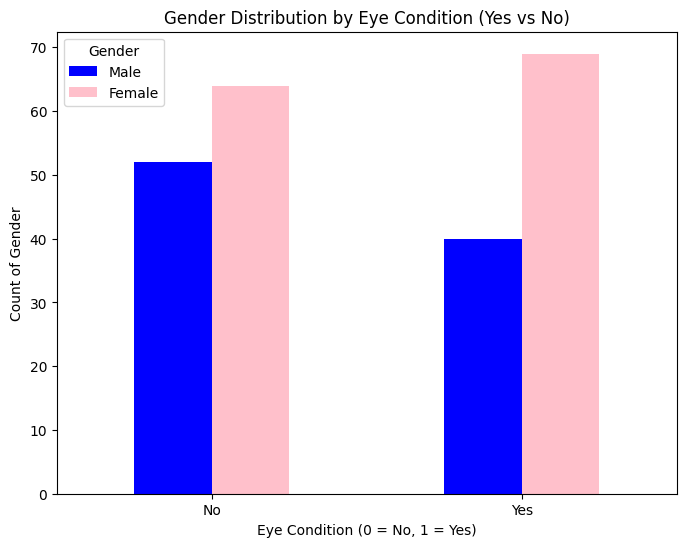

In [147]:
import matplotlib.pyplot as plt

# Create a grouped bar chart for gender distribution by eye_condition (0 = no, 1 = yes)
gender_eye_condition_distribution.plot(kind="bar", stacked=False, color=["blue", "pink"], figsize=(8, 6))

# Set labels and title
plt.title("Gender Distribution by Eye Condition (Yes vs No)")
plt.xlabel("Eye Condition (0 = No, 1 = Yes)")
plt.ylabel("Count of Gender")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
plt.legend(["Male", "Female"], title="Gender")
plt.show()
